# Planning our photometric observations

I like using astroplan to plan my observations. You can find more information here: https://astroplan.readthedocs.io/en/latest/

In [97]:
# userful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import astroquery.ned as NED
import astropy.coordinates as coords
import astropy.units as u
from astropy.io import ascii
from astropy.time import Time
from astropy.wcs import WCS
from astropy.wcs import utils
import astroplan as ap
import astroplan.plots as app
import matplotlib.dates as mdates
from regions import RectangleSkyRegion, RectanglePixelRegion

In [4]:
# make sure stuff is up to date
from astroplan import download_IERS_A
download_IERS_A()

In [5]:
# load our target list
targetlist = ascii.read('../targets/Targets.csv')
targetlist

﻿Name,RA,Dec,Morph,Mag,Filter,Exp_B,Exp_V,Exp_r,Exp_i,Exp_Ha,Exp_z,z,Notes
str24,str14,str14,str14,float64,str1,float64,float64,float64,str10,str8,int64,float64,str69
UGCA 050,03:03:50.52,-25:16:20.496,Sb,14.18,V,26.0,9.3,7.4,5.8,160,--,0.00576,Diameter 2.4'
NGC 3265,10:31:06.768,28:47:47.976,E,12.8,I,23.0,6.6,5.0,3.6,110,--,0.0044,"Diameter 1.3', low airmass might make it challenging for spectroscopy"
GSF 016,03:51:33.2208,-46:35:46.896,E,15.04,I,200.0,66.0,52.0,40,"1,080.00",--,0.00343,"Relatively compact, good for spectroscopy"
ESO 482- G 005,03:33:02.112,-24:07:59.16,SB,14.32,B,11.64,4.0,3.52,2.5,70,--,0.00639,"Very bright, 3' diameter"
NGC 1464,03:51:24.50592,-15:24:08.1612,??,14.16,I,98.0,30.0,22.0,18,511,--,0.00579,Cool target to find out more about morphology?
NGC 4262,12:19:30.582,14:52:39.7812,S0,12.7,V,8.0,2.5,2.0,too bright,42,--,0.00453,Bright but pretty -- courtesy of Juan Carlos
MRK 0841,15:04:01.0,10:26:16.0,E/QSO,13.7,R,22.0,15.0,21.0,24,--,--,0.036,"Diameter 30"""
SDSS J083148.87+04.49419,08:31:49,04:49:41.90s,star/QSO,15.4,r,--,--,--,--,--,--,0.1738,--
SDSS J091702.38-004417.5,09:17:02,-00:44:18,star/QSO,16.65,r,--,--,--,--,--,--,0.322,--


In [6]:
# set the observer and the time
site = ap.Observer.at_site('lasilla')
time_grid = Time(['2020-02-10 22:00']) + np.arange(0, 13, 0.1)*u.hour
moon = site.moon_altaz(time_grid) # the moon :) 

In [7]:
target = ap.FixedTarget.from_name(targetlist['\ufeffName'][0]) 


We can now plot the visibilities of this object as well as a finding chart. An ideal finding chart also has the field of view on it. 

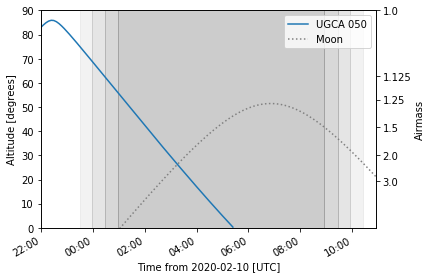

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_altitude(target, site, time_grid, 
              brightness_shading=True, airmass_yaxis=True,
              ax=ax)
ax.plot(time_grid.plot_date, moon.alt, color = 'gray', ls = ':', label = 'Moon')
ax.legend(loc=1)

(<matplotlib.axes._subplots.WCSAxesSubplot at 0x11ac62a50>,
 <astropy.io.fits.hdu.image.PrimaryHDU at 0x11ac5b890>)

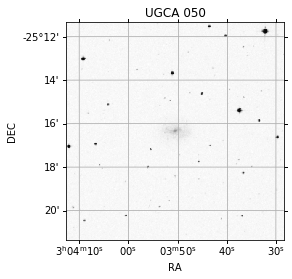

In [9]:
app.plot_finder_image(target)

We can also do a visibility plot for more targets at a time.

In [24]:
targets = [ap.FixedTarget.from_name(target) for target in targetlist['\ufeffName'][:8]]

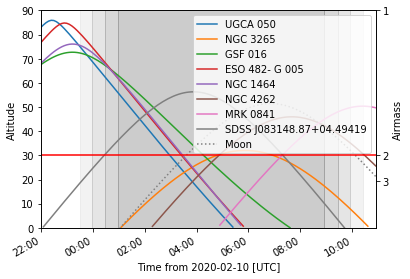

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
app.plot_altitude(targets, site, time_grid, 
              brightness_shading=True, airmass_yaxis=True,
              ax=ax)
ax.plot(time_grid.plot_date, moon.alt, color = 'gray', ls = ':', label = 'Moon')
ax.axhline(30, color='r')
ax.legend(loc=1)

We can also quickly plot the lunar separations of the targets and check that they are larger than 30 degrees.

Text(0.5, 0, 'Time')

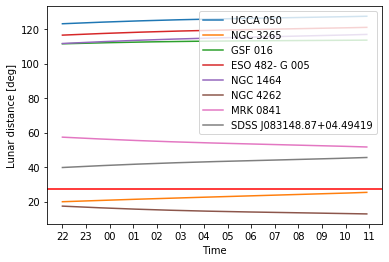

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
hours = mdates.HourLocator()
hoursFmt = mdates.DateFormatter('%H')
ax1.xaxis.set_major_locator(hours)
ax1.xaxis.set_major_formatter(hoursFmt)
for target in targets:
    ax1.plot_date(time_grid.plot_date, moon.separation(target.coord).deg, fmt='-',
                  label=target.name)
ax1.legend(loc=1)
ax1.axhline(27, color='r')
ax1.set_ylabel('Lunar distance [deg]')
ax1.set_xlabel('Time')

Lastly, to create finding charts, we would like to put the FoV of EFOSC or DFOSC on the plot. The EFOSC FoV is 4x4 arcminutes,

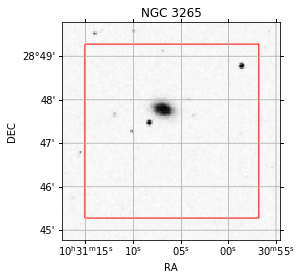

In [138]:
ax, hdu = app.plot_finder_image(targets[1], fov_radius=5*u.arcmin)
wcs = WCS(hdu.header)
wcs_im = wcs.celestial
transform = ax.get_transform('fk5')
# what is below is incredibly cumbersome, but I have yet to find a nicer way to this...
rectangle_sky = RectangleSkyRegion(center=targets[1].coord,
                                   width=4 * u.arcmin, height=4 * u.arcmin,
                                   angle=0 * u.deg)
rectangle_topix = rectangle_sky.to_pixel(wcs_im)
rectangle_pix = RectanglePixelRegion(rectangle_topix.center, 
                                       rectangle_topix.width, rectangle_topix.height, 
                                       rectangle_topix.angle)
rectangle = Polygon(rectangle_topix.corners, facecolor='None', edgecolor='r')
ax.add_artist(rectangle)

In [134]:
rectangle_pix.corners

array([[-50.51998865, -50.2793264 ],
       [349.48001137, -50.27927171],
       [349.47995667, 349.72072831],
       [-50.52004335, 349.72067361]])

In [98]:
Polygon?